In [ ]:
!rm -rf "/content/Fake-News-Detection-Text-Classification"

In [ ]:
import pandas as pd

In [ ]:
!git clone https://github.com/shariqfz/Fake-News-Detection-Text-Classification.git

Cloning into 'Fake-News-Detection-Text-Classification'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 171 (delta 41), reused 16 (delta 11), pack-reused 84
Receiving objects: 100% (171/171), 127.31 MiB | 16.17 MiB/s, done.
Resolving deltas: 100% (68/68), done.
Updating files: 100% (24/24), done.


In [ ]:
# data_path = "/content/Fake-News-Detection-Text-Classification/data/HateSpeech/hate_speech_cleaned_and_stopword_removed_combined_data.csv"

hate_speech_data_path = "/content/Fake-News-Detection-Text-Classification/data/hate_speech_concatenated_in_text.csv"

data = pd.read_csv(hate_speech_data_path)

In [ ]:
data.head()

,Unnamed: 0,text,Label,hate_speech_class
0,17226,seven miner kill one miss coal mine collaps tu...,1.0,0
1,10782,treasuri weiss wit hous puerto rico hear offic...,1.0,1
2,19623,least peopl kill earthquak mexico least peopl ...,1.0,0
3,16853,graft probe mexico presid alli pose tricki cha...,1.0,0
4,9050,us militari say disclos detail injur servic me...,1.0,2


In [ ]:
data['text'].iloc[0]

'obama say continu tri affect chang syria us presid barack obama thursday said would naiv expect degre turn russia syrian presid bashar al assad unit state alli would continu tri affect chang end deadli syrian crisi obama spoke joint news confer meet german chancellor angela merkel Neither Hate Speech nor Offensive'

In [ ]:
"""
class meanings:

0 - hate speech
1 - offensive language
2 - neither

"""

'\nclass meanings:\n\n0 - hate speech\n1 - offensive language\n2 - neither\n\n'

In [ ]:
from sklearn.model_selection import train_test_split
X=data['text']
Y=data['Label']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30, random_state = 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn import svm
import pandas as pd

# Assuming you have a DataFrame fake_news_data
X = data['text']
Y = data['Label']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Replace NaN values with an empty string
x_train = x_train.fillna('')
x_test = x_test.fillna('')

# Initialize CountVectorizer
vc = CountVectorizer()

# Fit and transform both training and testing sets
features = vc.fit_transform(x_train)
features_test = vc.transform(x_test)

# Perform imputation on y_train and y_test
imputer = SimpleImputer(strategy='most_frequent')
y_train_imputed = imputer.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_imputed = imputer.transform(y_test.to_numpy().reshape(-1, 1))

# Initialize and train the SVM model
model = svm.SVC()
model.fit(features, y_train_imputed)

# Check the accuracy on the testing set
accuracy = model.score(features_test, y_test_imputed)
print(f'Accuracy: {round(accuracy * 100, 2)}%')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 94.0%


Misclassified instances:
                                                  Text  Actual_Label  \
242  onc outsid conserv koch network warm trump gli...           1.0   
494  whoa clinton grifter bag million blood miner f...           0.0   
528  muslim athlet given hero welcom indict sexual ...           0.0   
838  trump reject futur pull pari climat pact obama...           1.0   
463  bombshel frustrat outgo armi gener say obama m...           0.0   
449  senat democrat plan forc guncontrol amend gop ...           0.0   
551  argentin court sentenc life dictatorship crime...           1.0   
705  senat give trump jr ultimatum respond friday f...           0.0   
223  obama epa push tougher mileag standard truck e...           0.0   
587  us presid trump arriv israel flight riyadh us ...           1.0   
233  pope urg trump show concern poor guid ethic va...           1.0   
994  clint eastwood trump say dumb thing peopl get ...           1.0   
19   clinton gain onlin bet market us p

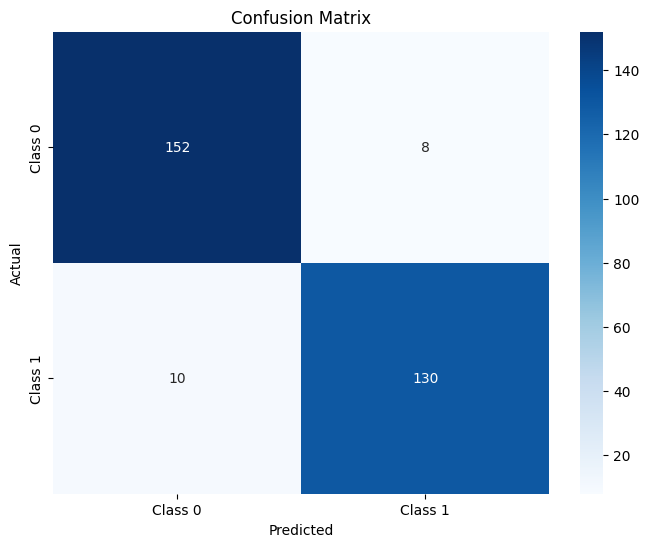

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the labels for the test set
predicted_labels = model.predict(features_test)

# Find misclassified instances
misclassified_data = pd.DataFrame({'Text': x_test, 'Actual_Label': y_test_imputed.flatten(), 'Predicted_Label': predicted_labels})
misclassified_data = misclassified_data[misclassified_data['Actual_Label'] != misclassified_data['Predicted_Label']]

# Append misclassified instances to the DataFrame
fake_news_data_misclassified = data.copy()
fake_news_data_misclassified['Misclassified'] = False
fake_news_data_misclassified.loc[fake_news_data_misclassified.index.isin(misclassified_data.index), 'Misclassified'] = True

# Print misclassified instances
print("Misclassified instances:")
print(misclassified_data)

# Compute precision, recall, and f1 score
precision = precision_score(y_test_imputed, predicted_labels, average='binary')
recall = recall_score(y_test_imputed, predicted_labels, average='binary')
f1 = f1_score(y_test_imputed, predicted_labels, average='binary')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_imputed, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Generate the classification report
class_report = classification_report(y_test_imputed, predicted_labels, target_names=['Class 0', 'Class 1'])
print('Classification Report:')
print(class_report)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
https://www.kaggle.com/code/johnybhiduri/fake-news-detection-using-svm

# New section

In [ ]:
new_data=pd.read_csv("/content/misclassified_data.csv")

In [ ]:
X = data['text']
Y = data['Label']

In [ ]:
features_test = vc.transform(X)


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
Y_imputed = imputer.fit_transform(Y.to_numpy().reshape(-1, 1))



In [ ]:
accuracy = model.score(features_test, Y_imputed)
print(f'Accuracy: {round(accuracy * 100, 2)}%')


Accuracy: 97.5%


In [ ]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Predict the labels for the test set
predicted_labels = model.predict(features_test)

# Create DataFrames for misclassified and correctly classified instances
misclassified_data = pd.DataFrame({'Text':X, 'Actual_Label': Y, 'Predicted_Label': predicted_labels})
correctly_classified_data = pd.DataFrame(columns=['Text', 'Actual_Label', 'Predicted_Label'])

# Iterate through test instances and check if they are misclassified
for i in range(len(x_test)):
    if y_test_imputed[i] == predicted_labels[i]:
        correctly_classified_data = correctly_classified_data.append({'Text': X.iloc[i], 'Actual_Label': Y[i], 'Predicted_Label': predicted_labels[i]}, ignore_index=True)

# Save misclassified and correctly classified data to CSV files
misclassified_data.to_csv('misclassified_data.csv', index=False)
correctly_classified_data.to_csv('correctly_classified_data.csv', index=False)

<ipython-input-15-a050c43c3278>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correctly_classified_data = correctly_classified_data.append({'Text': X.iloc[i], 'Actual_Label': Y[i], 'Predicted_Label': predicted_labels[i]}, ignore_index=True)
<ipython-input-15-a050c43c3278>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correctly_classified_data = correctly_classified_data.append({'Text': X.iloc[i], 'Actual_Label': Y[i], 'Predicted_Label': predicted_labels[i]}, ignore_index=True)
<ipython-input-15-a050c43c3278>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correctly_classified_data = correctly_classified_data.append({'Text': X.iloc[i], 'Actual_Label': Y[i], 'Predicted_Label': predicted_labels[i]}, ignore_index=True